In [1]:
#載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
#載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
df = pd.read_csv('./014data_mid.csv', names=['R','S','T','U','V','W','target'])
df.head()

,R,S,T,U,V,W,target
0,464.626129,729.220886,350.260651,639.945679,2839.020020,11789.40234,89
1,465.712616,725.102966,350.260651,641.529175,2846.915039,11798.15137,89
2,466.799072,721.808655,347.722534,633.611633,2839.020020,11793.77734,89
3,461.366730,717.690735,346.876495,632.028076,2825.203857,11674.56152,89
4,461.366730,716.043579,346.030457,631.236328,2818.295898,11647.21777,89


In [4]:
#顯示資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       1201 non-null   float64
 1   S       1201 non-null   float64
 2   T       1201 non-null   float64
 3   U       1201 non-null   float64
 4   V       1201 non-null   float64
 5   W       1201 non-null   float64
 6   target  1201 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 65.8 KB


In [5]:
#快速用圖表探索資料
#使用pairplot探索數字型之間有沒有任何趨勢
# sns.pairplot(df)

In [6]:
#利用distplot來看主要集中的區間
# sns.distplot(df['target'])

<AxesSubplot:>

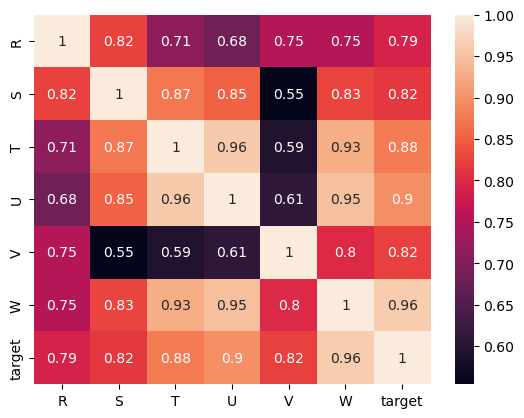

In [7]:
#利用df.corr()先做出個變數間的關係係數，再用heatmap作圖
sns.heatmap(df.corr(),annot=True)

In [8]:
#訓練線性模型
#X是想探索的自變數，Y是依變數
df.columns

Index(['R', 'S', 'T', 'U', 'V', 'W', 'target'], dtype='object')

In [9]:
#準備X & Y array
X = df[['R','S','T', 'U', 'V', 'W']]
y = df['target']

In [10]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

In [11]:
#test_size代表測試組比例。random_state代表設定隨機種子，讓測試結果可被重複
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [12]:
#載入線性迴歸，並訓練模型
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
#取得截距。如果公式是y=a+bx，a即是截距
print(model.intercept_)

-1470.3256767739829


In [14]:
# #取得迴歸係數，並用Data Frame顯示
# model.coef_

In [15]:
#查看模型的表現
model.score(X_train,y_train)

0.9418635383115063

In [16]:
X_train.columns

Index(['R', 'S', 'T', 'U', 'V', 'W'], dtype='object')

In [17]:
#從迴歸係數中，數值越高代表影響越大
cdf = pd.DataFrame(model.coef_,X_train.columns,columns=['Coef'])
cdf

,Coef
R,0.591496
S,0.049162
T,-0.215402
U,-0.020990
V,0.073120
W,0.095776


In [18]:
#預測
#使用測試組資料來預設結果
predictions = model.predict(X_test)
predictions

array([ 74.42423006, 144.11713099, 191.55029927,  78.33297467,
       140.06495698,  98.74151765,  90.22426338, 130.47450021,
        83.53977287, 144.4659911 ,  81.0817613 , 138.6137807 ,
        88.17163259, 183.63093016,  95.53863763, 154.7994376 ,
        81.738644  ,  83.11449519, 139.20939693,  83.0359319 ,
        82.87754775,  90.31812959,  89.10262675,  81.73439614,
       128.00124902, 191.58015932,  86.34677489, 135.37647821,
       135.27927094, 140.45263387,  83.87742674, 140.35402153,
        88.46128057,  86.75549351, 141.7774223 , 142.73881252,
        85.40189298, 144.96332198,  85.52228814, 120.65725106,
       124.2532369 , 143.72821609, 206.59736768,  89.2064887 ,
       122.6413538 , 136.41401549,  80.03955412, 130.11066569,
       121.80883871, 197.9444026 ,  82.55455651, 133.55008833,
        92.24288141, 146.36272995, 146.09910054,  76.9366828 ,
        90.38982581, 128.57726033, 138.16498569, 145.5424529 ,
       132.95075811, 133.31131099, 180.05622013, 138.56

In [19]:
#比較實際房價及預測房價的關係
#plt.scatter(y_test,predictions)

C:\Users\isecuser\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

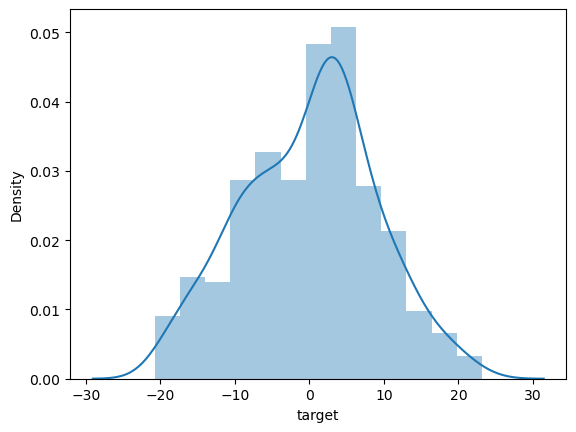

In [20]:
#看實際值及預測值之間的殘差分佈圖
sns.distplot((y_test-predictions))

In [21]:
#評估模型好壞
#載入迴歸常見的評估指標
from sklearn import metrics

In [22]:
#Mean Absolute Error(MAE)代表平均誤差，公式為所有實際值及預測值相減的絕對值平均
metrics.mean_absolute_error(y_test,predictions)

7.296727116055752

In [23]:
#Mean Squared Error(MSE)比起MSE可以拉開誤差差距，算是蠻常用的指標。公式為所有實際值及預測值相減的平方的平均
metrics.mean_squared_error(y_test,predictions)

80.32522183925687

In [24]:
#Root Mean Squared Error(RMSE)代表MSE的平分根。比起MSE更為常用，因為更容易解釋y
np.sqrt(metrics.mean_squared_error(y_test,predictions))

8.962433923843282

In [25]:
score = model.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.9408673826130085
Accuracy: 94.08673826130085%


# 預測結果

In [26]:
y_pre_linear = model.predict(X_test)

In [27]:
# print(y_pre_linear[:5])

In [28]:
df = pd.DataFrame({'y_pre':y_pre_linear})
df.to_csv("LinearRegression.output.csv",index=False,sep=',')
df = pd.DataFrame({'y_test':y_test})
df.to_csv("LinearRegression.test.csv",index=False,sep=',')

In [29]:
y_test

983     80
753    148
435    189
937     80
295    143
      ... 
464    189
807     80
969     80
225    143
346    143
Name: target, Length: 361, dtype: int64

# 模型保存

In [30]:
# import pickle

# # 保存模型
# pickle.dump(model, open("pima.pickle.dat", "wb"))

# # 使用pickle加載模型文件
# loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

# # 使用模型對測試數據進行預測
# y_pred = loaded_model.predict(X_test)
# predictions = [round(value) for value in y_pred]

# # evaluate predictions 評估模型
# accuracy = accuracy_score(y_test, predictions)

In [31]:
# predictions